# Exploratory Data Analysis



In [3]:
import pandas
df = pandas.read_csv("IndianFoodDatasetCSV.csv")

In [4]:
df

,Srno,RecipeName,TranslatedRecipeName,Ingredients,TranslatedIngredients,PrepTimeInMins,CookTimeInMins,TotalTimeInMins,Servings,Cuisine,Course,Diet,Instructions,TranslatedInstructions,URL
0,1,Masala Karela Recipe,Masala Karela Recipe,"6 Karela (Bitter Gourd/ Pavakkai) - deseeded,S...","6 Karela (Bitter Gourd/ Pavakkai) - deseeded,S...",15,30,45,6,Indian,Side Dish,Diabetic Friendly,"To begin making the Masala Karela Recipe,de-se...","To begin making the Masala Karela Recipe,de-se...",https://www.archanaskitchen.com/masala-karela-...
1,2,टमाटर पुलियोगरे रेसिपी - Spicy Tomato Rice (Re...,Spicy Tomato Rice (Recipe),"2-1/2 कप चावल - पका ले,3 टमाटर,3 छोटा चमच्च बी...","2-1 / 2 cups rice - cooked, 3 tomatoes, 3 teas...",5,10,15,3,South Indian Recipes,Main Course,Vegetarian,टमाटर पुलियोगरे बनाने के लिए सबसे पहले टमाटर क...,"To make tomato puliogere, first cut the tomato...",http://www.archanaskitchen.com/spicy-tomato-ri...
2,3,Ragi Semiya Upma Recipe - Ragi Millet Vermicel...,Ragi Semiya Upma Recipe - Ragi Millet Vermicel...,"1-1/2 cups Rice Vermicelli Noodles (Thin),1 On...","1-1/2 cups Rice Vermicelli Noodles (Thin),1 On...",20,30,50,4,South Indian Recipes,South Indian Breakfast,High Protein Vegetarian,"To begin making the Ragi Vermicelli Recipe, fi...","To begin making the Ragi Vermicelli Recipe, fi...",http://www.archanaskitchen.com/ragi-vermicelli...
3,4,Gongura Chicken Curry Recipe - Andhra Style Go...,Gongura Chicken Curry Recipe - Andhra Style Go...,"500 grams Chicken,2 Onion - chopped,1 Tomato -...","500 grams Chicken,2 Onion - chopped,1 Tomato -...",15,30,45,4,Andhra,Lunch,Non Vegeterian,To begin making Gongura Chicken Curry Recipe f...,To begin making Gongura Chicken Curry Recipe f...,http://www.archanaskitchen.com/gongura-chicken...
4,5,आंध्रा स्टाइल आलम पचड़ी रेसिपी - Adrak Chutney ...,Andhra Style Alam Pachadi Recipe - Adrak Chutn...,"1 बड़ा चमच्च चना दाल,1 बड़ा चमच्च सफ़ेद उरद दाल,2...","1 tablespoon chana dal, 1 tablespoon white ura...",10,20,30,4,Andhra,South Indian Breakfast,Vegetarian,आंध्रा स्टाइल आलम पचड़ी बनाने के लिए सबसे पहले ...,"To make Andhra Style Alam Pachadi, first heat ...",https://www.archanaskitchen.com/andhra-style-a...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6866,14073,गोअन मशरुम जकुटी रेसिपी - Goan Mushroom Xacuti...,Goan Mushroom Xacuti Recipe,"20 बटन मशरुम,2 प्याज - काट ले,1 टमाटर - बारीक ...","20 बटन मशरुम,2 प्याज - काट ले,1 टमाटर - बारीक ...",15,45,60,4,Goan Recipes,Lunch,Vegetarian,गोअन मशरुम जकुटी रेसिपी बनाने के लिए सबसे पहले...,गोअन मशरुम जकुटी रेसिपी बनाने के लिए सबसे पहले...,https://www.archanaskitchen.com/goan-mushroom-...
6867,14107,शकरकंदी और मेथी का पराठा रेसिपी - Sweet Potato...,Sweet Potato & Methi Stuffed Paratha Recipe,"1 बड़ा चम्मच तेल,1 कप गेहूं का आटा,नमक - स्वाद ...","1 बड़ा चम्मच तेल,1 कप गेहूं का आटा,नमक - स्वाद ...",30,60,90,4,North Indian Recipes,North Indian Breakfast,Diabetic Friendly,शकरकंदी और मेथी का पराठा रेसिपी बनाने के लिए स...,शकरकंदी और मेथी का पराठा रेसिपी बनाने के लिए स...,https://www.archanaskitchen.com/sweet-potato-m...
6868,14165,Ullikadala Pulusu Recipe | Spring Onion Curry,Ullikadala Pulusu Recipe | Spring Onion Curry,150 grams Spring Onion (Bulb & Greens) - chopp...,150 grams Spring Onion (Bulb & Greens) - chopp...,5,10,15,2,Andhra,Side Dish,Vegetarian,To begin making Ullikadala Pulusu Recipe | Spr...,To begin making Ullikadala Pulusu Recipe | Spr...,https://www.archanaskitchen.com/ullikadala-pul...
6869,14167,Kashmiri Style Kokur Yakhni Recipe-Chicken Coo...,Kashmiri Style Kokur Yakhni Recipe-Chicken Coo...,"1 kg Chicken - medium pieces,1/2 cup Mustard o...","1 kg Chicken - medium pieces,1/2 cup Mustard o...",30,45,75,4,Kashmiri,Lunch,Non Vegeterian,To begin making the Kashmiri Kokur Yakhni reci...,To begin making the Kashmiri Kokur Yakhni reci...,http://www.archanaskitchen.com/kashmiri-kokur-...


In [5]:
df.dropna(inplace=True)
df

,Srno,RecipeName,TranslatedRecipeName,Ingredients,TranslatedIngredients,PrepTimeInMins,CookTimeInMins,TotalTimeInMins,Servings,Cuisine,Course,Diet,Instructions,TranslatedInstructions,URL
0,1,Masala Karela Recipe,Masala Karela Recipe,"6 Karela (Bitter Gourd/ Pavakkai) - deseeded,S...","6 Karela (Bitter Gourd/ Pavakkai) - deseeded,S...",15,30,45,6,Indian,Side Dish,Diabetic Friendly,"To begin making the Masala Karela Recipe,de-se...","To begin making the Masala Karela Recipe,de-se...",https://www.archanaskitchen.com/masala-karela-...
1,2,टमाटर पुलियोगरे रेसिपी - Spicy Tomato Rice (Re...,Spicy Tomato Rice (Recipe),"2-1/2 कप चावल - पका ले,3 टमाटर,3 छोटा चमच्च बी...","2-1 / 2 cups rice - cooked, 3 tomatoes, 3 teas...",5,10,15,3,South Indian Recipes,Main Course,Vegetarian,टमाटर पुलियोगरे बनाने के लिए सबसे पहले टमाटर क...,"To make tomato puliogere, first cut the tomato...",http://www.archanaskitchen.com/spicy-tomato-ri...
2,3,Ragi Semiya Upma Recipe - Ragi Millet Vermicel...,Ragi Semiya Upma Recipe - Ragi Millet Vermicel...,"1-1/2 cups Rice Vermicelli Noodles (Thin),1 On...","1-1/2 cups Rice Vermicelli Noodles (Thin),1 On...",20,30,50,4,South Indian Recipes,South Indian Breakfast,High Protein Vegetarian,"To begin making the Ragi Vermicelli Recipe, fi...","To begin making the Ragi Vermicelli Recipe, fi...",http://www.archanaskitchen.com/ragi-vermicelli...
3,4,Gongura Chicken Curry Recipe - Andhra Style Go...,Gongura Chicken Curry Recipe - Andhra Style Go...,"500 grams Chicken,2 Onion - chopped,1 Tomato -...","500 grams Chicken,2 Onion - chopped,1 Tomato -...",15,30,45,4,Andhra,Lunch,Non Vegeterian,To begin making Gongura Chicken Curry Recipe f...,To begin making Gongura Chicken Curry Recipe f...,http://www.archanaskitchen.com/gongura-chicken...
4,5,आंध्रा स्टाइल आलम पचड़ी रेसिपी - Adrak Chutney ...,Andhra Style Alam Pachadi Recipe - Adrak Chutn...,"1 बड़ा चमच्च चना दाल,1 बड़ा चमच्च सफ़ेद उरद दाल,2...","1 tablespoon chana dal, 1 tablespoon white ura...",10,20,30,4,Andhra,South Indian Breakfast,Vegetarian,आंध्रा स्टाइल आलम पचड़ी बनाने के लिए सबसे पहले ...,"To make Andhra Style Alam Pachadi, first heat ...",https://www.archanaskitchen.com/andhra-style-a...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6866,14073,गोअन मशरुम जकुटी रेसिपी - Goan Mushroom Xacuti...,Goan Mushroom Xacuti Recipe,"20 बटन मशरुम,2 प्याज - काट ले,1 टमाटर - बारीक ...","20 बटन मशरुम,2 प्याज - काट ले,1 टमाटर - बारीक ...",15,45,60,4,Goan Recipes,Lunch,Vegetarian,गोअन मशरुम जकुटी रेसिपी बनाने के लिए सबसे पहले...,गोअन मशरुम जकुटी रेसिपी बनाने के लिए सबसे पहले...,https://www.archanaskitchen.com/goan-mushroom-...
6867,14107,शकरकंदी और मेथी का पराठा रेसिपी - Sweet Potato...,Sweet Potato & Methi Stuffed Paratha Recipe,"1 बड़ा चम्मच तेल,1 कप गेहूं का आटा,नमक - स्वाद ...","1 बड़ा चम्मच तेल,1 कप गेहूं का आटा,नमक - स्वाद ...",30,60,90,4,North Indian Recipes,North Indian Breakfast,Diabetic Friendly,शकरकंदी और मेथी का पराठा रेसिपी बनाने के लिए स...,शकरकंदी और मेथी का पराठा रेसिपी बनाने के लिए स...,https://www.archanaskitchen.com/sweet-potato-m...
6868,14165,Ullikadala Pulusu Recipe | Spring Onion Curry,Ullikadala Pulusu Recipe | Spring Onion Curry,150 grams Spring Onion (Bulb & Greens) - chopp...,150 grams Spring Onion (Bulb & Greens) - chopp...,5,10,15,2,Andhra,Side Dish,Vegetarian,To begin making Ullikadala Pulusu Recipe | Spr...,To begin making Ullikadala Pulusu Recipe | Spr...,https://www.archanaskitchen.com/ullikadala-pul...
6869,14167,Kashmiri Style Kokur Yakhni Recipe-Chicken Coo...,Kashmiri Style Kokur Yakhni Recipe-Chicken Coo...,"1 kg Chicken - medium pieces,1/2 cup Mustard o...","1 kg Chicken - medium pieces,1/2 cup Mustard o...",30,45,75,4,Kashmiri,Lunch,Non Vegeterian,To begin making the Kashmiri Kokur Yakhni reci...,To begin making the Kashmiri Kokur Yakhni reci...,http://www.archanaskitchen.com/kashmiri-kokur-...


In [6]:
df.drop(["RecipeName", "Ingredients", "Servings", "Instructions",  "URL"], axis = 1, inplace = True)
df

,Srno,TranslatedRecipeName,TranslatedIngredients,PrepTimeInMins,CookTimeInMins,TotalTimeInMins,Cuisine,Course,Diet,TranslatedInstructions
0,1,Masala Karela Recipe,"6 Karela (Bitter Gourd/ Pavakkai) - deseeded,S...",15,30,45,Indian,Side Dish,Diabetic Friendly,"To begin making the Masala Karela Recipe,de-se..."
1,2,Spicy Tomato Rice (Recipe),"2-1 / 2 cups rice - cooked, 3 tomatoes, 3 teas...",5,10,15,South Indian Recipes,Main Course,Vegetarian,"To make tomato puliogere, first cut the tomato..."
2,3,Ragi Semiya Upma Recipe - Ragi Millet Vermicel...,"1-1/2 cups Rice Vermicelli Noodles (Thin),1 On...",20,30,50,South Indian Recipes,South Indian Breakfast,High Protein Vegetarian,"To begin making the Ragi Vermicelli Recipe, fi..."
3,4,Gongura Chicken Curry Recipe - Andhra Style Go...,"500 grams Chicken,2 Onion - chopped,1 Tomato -...",15,30,45,Andhra,Lunch,Non Vegeterian,To begin making Gongura Chicken Curry Recipe f...
4,5,Andhra Style Alam Pachadi Recipe - Adrak Chutn...,"1 tablespoon chana dal, 1 tablespoon white ura...",10,20,30,Andhra,South Indian Breakfast,Vegetarian,"To make Andhra Style Alam Pachadi, first heat ..."
...,...,...,...,...,...,...,...,...,...,...
6866,14073,Goan Mushroom Xacuti Recipe,"20 बटन मशरुम,2 प्याज - काट ले,1 टमाटर - बारीक ...",15,45,60,Goan Recipes,Lunch,Vegetarian,गोअन मशरुम जकुटी रेसिपी बनाने के लिए सबसे पहले...
6867,14107,Sweet Potato & Methi Stuffed Paratha Recipe,"1 बड़ा चम्मच तेल,1 कप गेहूं का आटा,नमक - स्वाद ...",30,60,90,North Indian Recipes,North Indian Breakfast,Diabetic Friendly,शकरकंदी और मेथी का पराठा रेसिपी बनाने के लिए स...
6868,14165,Ullikadala Pulusu Recipe | Spring Onion Curry,150 grams Spring Onion (Bulb & Greens) - chopp...,5,10,15,Andhra,Side Dish,Vegetarian,To begin making Ullikadala Pulusu Recipe | Spr...
6869,14167,Kashmiri Style Kokur Yakhni Recipe-Chicken Coo...,"1 kg Chicken - medium pieces,1/2 cup Mustard o...",30,45,75,Kashmiri,Lunch,Non Vegeterian,To begin making the Kashmiri Kokur Yakhni reci...


In [7]:
list(df.TranslatedIngredients)[:10]

['6 Karela (Bitter Gourd/ Pavakkai) - deseeded,Salt - to taste,1 Onion - thinly sliced,3 tablespoon Gram flour (besan),2 teaspoons Turmeric powder (Haldi),1 tablespoon Red Chilli powder,2 teaspoons Cumin seeds (Jeera),1 tablespoon Coriander Powder (Dhania),1 tablespoon Amchur (Dry Mango Powder),Sunflower Oil - as required',
 '2-1 / 2 cups rice - cooked, 3 tomatoes, 3 teaspoons BC Belle Bhat powder, salt - as per taste, 1 teaspoon chickpea lentils, 1/2 teaspoon cumin seeds, 1 teaspoon white urad dal, 1/2 Teaspoon mustard, 1 green chilli, 1 dry red chilli, 2 teaspoon cashew - or peanuts, 1-1 / 2 tablespoon oil - 1/2 teaspoon asafoetida',
 '1-1/2 cups Rice Vermicelli Noodles (Thin),1 Onion - sliced,1/2 cup Carrots (Gajjar) - chopped,1/3 cup Green peas (Matar),2 Green Chillies,1/4 teaspoon Asafoetida (hing),1 teaspoon Mustard seeds,1 teaspoon White Urad Dal (Split),1 teaspoon Ghee,1 sprig Curry leaves,Salt - to taste,1 teaspoon Lemon juice',
 '500 grams Chicken,2 Onion - chopped,1 Tomato -

Problems with the dataset:
1. incomplete translations
2. noisy list of ingredients

## preprocessing translated ingredients
### 1. split on "-", take only the 1st part, split on (, take only the first part
### 2. remove measuring units, numbers, punctuation
### 3. lemmatize each ingredient word to group inflections (e.g. chillies -> chilli), remove leading and trailing space for each ingredient

In [9]:
from string import digits
from nltk.stem import WordNetLemmatizer 
import nltk
nltk.download('wordnet')
lemmatizer = WordNetLemmatizer() 

remove_nums_and_punct = str.maketrans('', '', digits+'/+')

measuring_units = ['tablespoon', 'teaspoon', 'tablespoons', 'teaspoons', 'inch', 'sprig', 'pinch', 'cloves', 'cup', 'cups', 'stalks', 'stalk', \
              'liter', 'grams', 'tbsp', 'tsp', 'as per taste']

comma_sep_ingredients = []

ingredients_as_lists = []

for index, row in df.iterrows():
  translated_instruction = row['TranslatedIngredients']
  translated_instruction =  ",".join([instr.lower().split("-")[0] for instr in translated_instruction.split(",")])
  translated_instruction =  ",".join([instr.split("(")[0] for instr in translated_instruction.split(",")])
  measuring_units_removed = " ".join([word.translate(remove_nums_and_punct) for word in translated_instruction.split(" ") if word not in measuring_units])
  strip_ingredients_and_lemmatize = ",".join([" ".join([lemmatizer.lemmatize(ingr_word) for ingr_word in ingredient.strip().split()]) for ingredient in measuring_units_removed.split(",") if len(ingredient.strip()) > 0])
  comma_sep_ingredients.append(strip_ingredients_and_lemmatize)
  ingredients_as_lists.append([" ".join(s.strip().split()) for s in strip_ingredients_and_lemmatize.split(",") if len(s.strip()) > 0])

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


In [10]:
comma_sep_ingredients[:10]

['karela,salt,onion,gram flour,turmeric powder,red chilli powder,cumin seed,coriander powder,amchur,sunflower oil',
 'tomato,bc belle bhat powder,salt,chickpea lentil,cumin seed,white urad dal,mustard,green chilli,dry red chilli,cashew',
 'onion,carrot,green pea,green chilli,asafoetida,mustard seed,white urad dal,ghee,curry leaf,salt,lemon juice',
 'chicken,onion,tomato,green chilli,ginger,garlic,turmeric powder,garam masala powder,sesame,salt,methi seed,coriander,dry red chilli,fennel seed,sesame,garlic,sorrel leaf,salt',
 'chana dal,white urad dal,red chilli,coriander seed,inch ginger,onion,tomato,salt,mustard,asafoetida,oil,curry',
 'rice,yellow moong dal,mint leaf,coriander,green chilli,ginger,cumin seed,water,sunflower oil,salt,ghee,cashew nut,cumin seed,whole black peppercorn,curry leaf,asafoetida',
 'vellai poosanikai,turmeric powder,salt,sunflower oil,dry red chilli,fresh coconut,tamarind water,methi seed,cumin seed,coriander,sesame seed,jaggery,tamarind water,sunflower oil,mus

In [11]:
# ingredients as a comma separated list
df['IngredientCommaSep'] =  comma_sep_ingredients
# ingredients as a list
df['IngredientList'] =  ingredients_as_lists

In [12]:
df

,Srno,TranslatedRecipeName,TranslatedIngredients,PrepTimeInMins,CookTimeInMins,TotalTimeInMins,Cuisine,Course,Diet,TranslatedInstructions,IngredientCommaSep,IngredientList
0,1,Masala Karela Recipe,"6 Karela (Bitter Gourd/ Pavakkai) - deseeded,S...",15,30,45,Indian,Side Dish,Diabetic Friendly,"To begin making the Masala Karela Recipe,de-se...","karela,salt,onion,gram flour,turmeric powder,r...","[karela, salt, onion, gram flour, turmeric pow..."
1,2,Spicy Tomato Rice (Recipe),"2-1 / 2 cups rice - cooked, 3 tomatoes, 3 teas...",5,10,15,South Indian Recipes,Main Course,Vegetarian,"To make tomato puliogere, first cut the tomato...","tomato,bc belle bhat powder,salt,chickpea lent...","[tomato, bc belle bhat powder, salt, chickpea ..."
2,3,Ragi Semiya Upma Recipe - Ragi Millet Vermicel...,"1-1/2 cups Rice Vermicelli Noodles (Thin),1 On...",20,30,50,South Indian Recipes,South Indian Breakfast,High Protein Vegetarian,"To begin making the Ragi Vermicelli Recipe, fi...","onion,carrot,green pea,green chilli,asafoetida...","[onion, carrot, green pea, green chilli, asafo..."
3,4,Gongura Chicken Curry Recipe - Andhra Style Go...,"500 grams Chicken,2 Onion - chopped,1 Tomato -...",15,30,45,Andhra,Lunch,Non Vegeterian,To begin making Gongura Chicken Curry Recipe f...,"chicken,onion,tomato,green chilli,ginger,garli...","[chicken, onion, tomato, green chilli, ginger,..."
4,5,Andhra Style Alam Pachadi Recipe - Adrak Chutn...,"1 tablespoon chana dal, 1 tablespoon white ura...",10,20,30,Andhra,South Indian Breakfast,Vegetarian,"To make Andhra Style Alam Pachadi, first heat ...","chana dal,white urad dal,red chilli,coriander ...","[chana dal, white urad dal, red chilli, corian..."
...,...,...,...,...,...,...,...,...,...,...,...,...
6866,14073,Goan Mushroom Xacuti Recipe,"20 बटन मशरुम,2 प्याज - काट ले,1 टमाटर - बारीक ...",15,45,60,Goan Recipes,Lunch,Vegetarian,गोअन मशरुम जकुटी रेसिपी बनाने के लिए सबसे पहले...,"बटन मशरुम,प्याज,टमाटर,टहनी हरा धनिया,कप नारियल...","[बटन मशरुम, प्याज, टमाटर, टहनी हरा धनिया, कप न..."
6867,14107,Sweet Potato & Methi Stuffed Paratha Recipe,"1 बड़ा चम्मच तेल,1 कप गेहूं का आटा,नमक - स्वाद ...",30,60,90,North Indian Recipes,North Indian Breakfast,Diabetic Friendly,शकरकंदी और मेथी का पराठा रेसिपी बनाने के लिए स...,"बड़ा चम्मच तेल,कप गेहूं का आटा,नमक,शकरकंदी,कप म...","[बड़ा चम्मच तेल, कप गेहूं का आटा, नमक, शकरकंदी,..."
6868,14165,Ullikadala Pulusu Recipe | Spring Onion Curry,150 grams Spring Onion (Bulb & Greens) - chopp...,5,10,15,Andhra,Side Dish,Vegetarian,To begin making Ullikadala Pulusu Recipe | Spr...,"spring onion,tamarind water,gram flour,sunflow...","[spring onion, tamarind water, gram flour, sun..."
6869,14167,Kashmiri Style Kokur Yakhni Recipe-Chicken Coo...,"1 kg Chicken - medium pieces,1/2 cup Mustard o...",30,45,75,Kashmiri,Lunch,Non Vegeterian,To begin making the Kashmiri Kokur Yakhni reci...,"kg chicken,mustard oil,ghee,cinnamon stick,to ...","[kg chicken, mustard oil, ghee, cinnamon stick..."


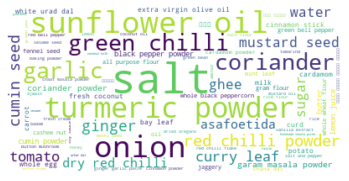

In [14]:
import matplotlib.pyplot as plt
from collections import Counter

from wordcloud import WordCloud

all_ingredients = []
for comma_sep_ingredient in comma_sep_ingredients:
  ingrs = [" ".join(s.strip().split()) for s in comma_sep_ingredient.split(",") if len(s.strip()) > 0]
  all_ingredients.extend(ingrs)

ingredient_counter = Counter(all_ingredients)
wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="white").generate_from_frequencies(ingredient_counter)

plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

In [15]:
ingredient_counter.most_common(10)

[('salt', 5474),
 ('onion', 2478),
 ('sunflower oil', 2444),
 ('turmeric powder', 2250),
 ('green chilli', 2012),
 ('garlic', 1976),
 ('coriander', 1921),
 ('red chilli powder', 1704),
 ('ginger', 1608),
 ('cumin seed', 1519)]

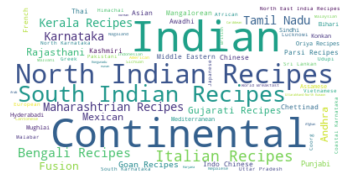

In [16]:
cuisines = Counter(list(df.Cuisine))
cuisines.most_common(1000)
wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="white").generate_from_frequencies(cuisines)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

In [17]:
cuisines.most_common(10)

[('Indian', 1157),
 ('Continental', 1020),
 ('North Indian Recipes', 936),
 ('South Indian Recipes', 681),
 ('Italian Recipes', 235),
 ('Bengali Recipes', 175),
 ('Maharashtrian Recipes', 173),
 ('Kerala Recipes', 163),
 ('Tamil Nadu', 156),
 ('Karnataka', 149)]

Cuisine: Indian


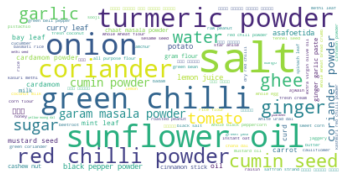

Cuisine: Continental


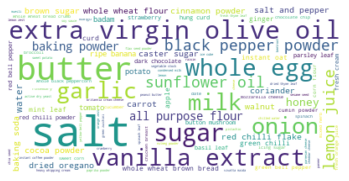

Cuisine: North Indian Recipes


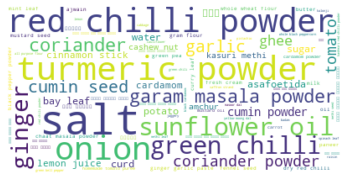

Cuisine: South Indian Recipes


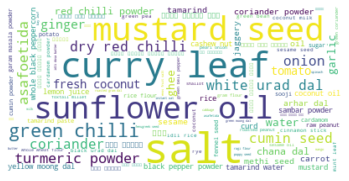

Cuisine: Italian Recipes


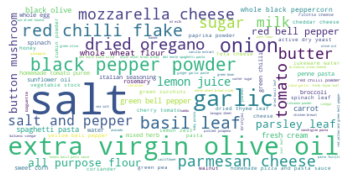

Cuisine: Bengali Recipes


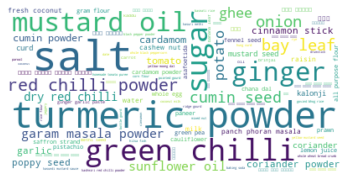

Cuisine: Maharashtrian Recipes


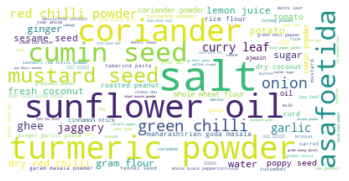

Cuisine: Kerala Recipes


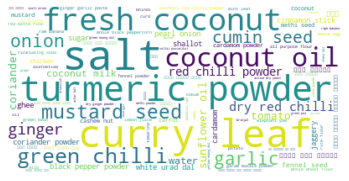

Cuisine: Tamil Nadu


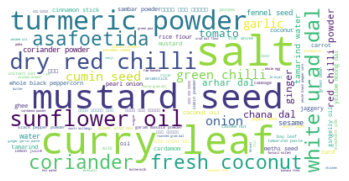

Cuisine: Karnataka


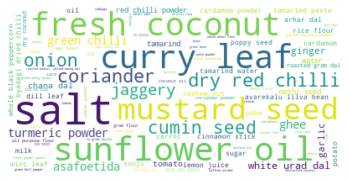

In [174]:
import matplotlib.pyplot as plt
from collections import Counter
from wordcloud import WordCloud

for cuisine, _ in Counter(list(df.Cuisine)).most_common(10):
  all_ingredients = []
  comma_sep_ingredients = list(df[df.Cuisine == cuisine].IngredientCommaSep)
  print("Cuisine:", cuisine)
  for comma_sep_ingredient in comma_sep_ingredients:
    ingrs = [" ".join(s.strip().split()) for s in comma_sep_ingredient.split(",") if len(s.strip()) > 0]
    all_ingredients.extend(ingrs)

  ingredient_counter = Counter(all_ingredients)
  wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="white").generate_from_frequencies(ingredient_counter)

  plt.figure()
  plt.imshow(wordcloud, interpolation="bilinear")
  plt.axis("off")
  plt.show()

In [ ]:
cuisines.most_common(10)

[('Indian', 1157),
 ('Continental', 1020),
 ('North Indian Recipes', 936),
 ('South Indian Recipes', 681),
 ('Italian Recipes', 235),
 ('Bengali Recipes', 175),
 ('Maharashtrian Recipes', 173),
 ('Kerala Recipes', 163),
 ('Tamil Nadu', 156),
 ('Karnataka', 149)]

In [18]:
df.describe(include=['object'])


,TranslatedRecipeName,TranslatedIngredients,Cuisine,Course,Diet,TranslatedInstructions,IngredientCommaSep,IngredientList
count,6865,6865,6865,6865,6865,6865,6865,6865
unique,6838,6857,82,20,10,6864,6850,6850
top,Beetroot Carrot Raita Recipe,"1 cup Broken Wheat (Dalia/ Godumai Rava),Salt ...",Indian,Lunch,Vegetarian,To prepare Four Cheese and Spinach Stuffed Mus...,"curd,water,curry leaf,green chilli,salt,black ...","[wheat flour, salt, oil, ghee]"
freq,2,2,1157,1763,4706,2,2,2


## Visual analysis of cuisine, course, diet

Text(0, 0.5, 'Course')

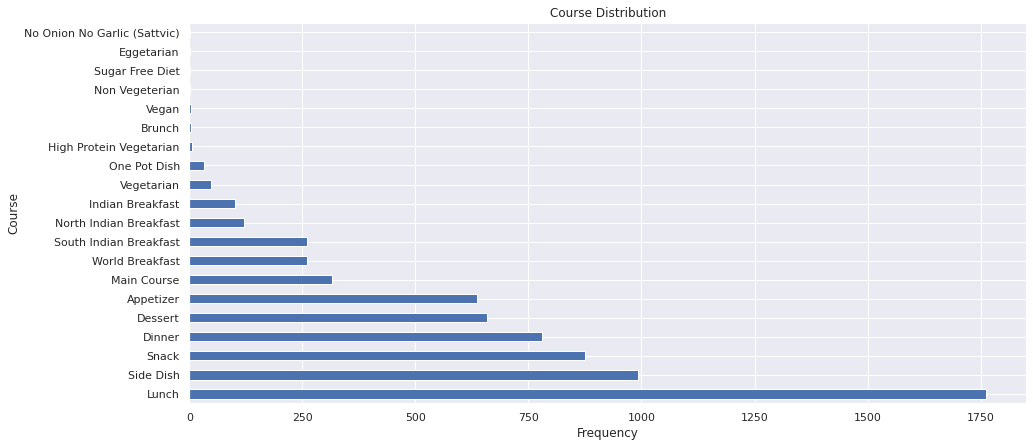

In [21]:
import seaborn as sns
sns.set(rc={'figure.figsize':(15,7)})
course_freq=df.Course.value_counts().plot.barh(title="Course Distribution")
course_freq.set_xlabel('Frequency')
course_freq.set_ylabel('Course')

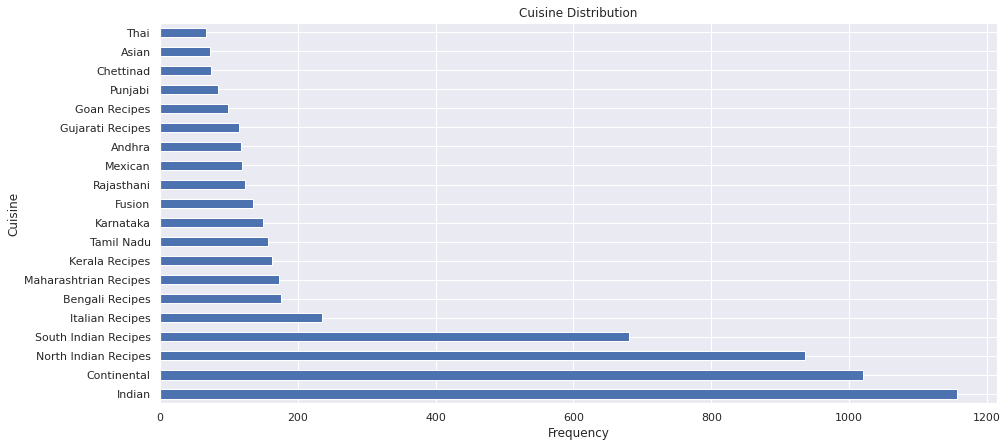

In [22]:
plt.rcParams['figure.figsize'] = 15,7
df.Cuisine.value_counts()[:20].plot.barh(title ="Cuisine Distribution")
plt.xlabel("Frequency")
plt.ylabel("Cuisine")
plt.show()

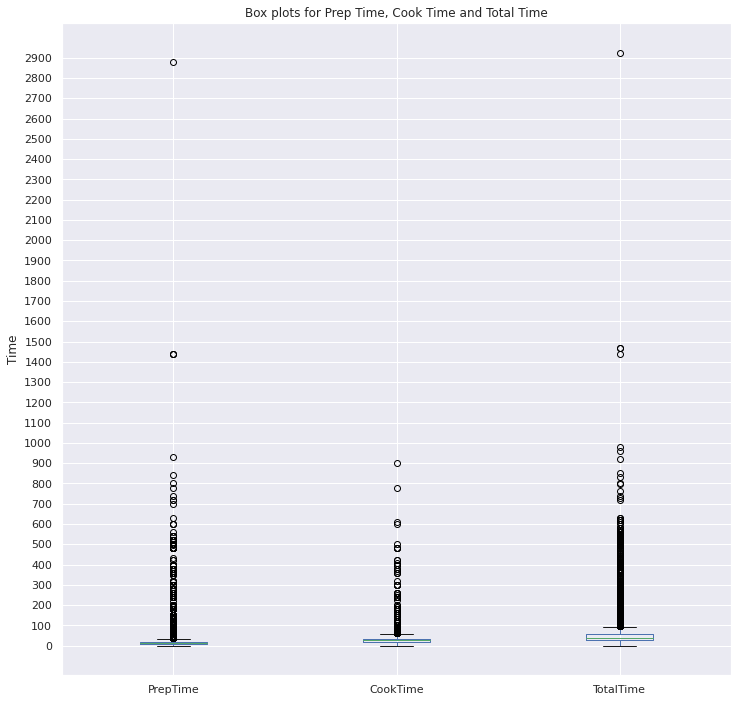

In [23]:
import pandas as pd
import numpy as np
plt.rcParams['figure.figsize'] = 12,12
CookPrepTimeDF = pd.DataFrame(data={'PrepTime': list(df.PrepTimeInMins), 'CookTime': list(df.CookTimeInMins), 'TotalTime': list(df.TotalTimeInMins)})
# CookPrepTimeDF.PrepTime.plot.hist(bins=100, alpha=0.7, title="Distributions of Prep Time")
CookPrepTimeDF.plot.box(title="Box plots for Prep Time, Cook Time and Total Time")
plt.yticks(np.arange(min(list(df.PrepTimeInMins)), max(list(df.TotalTimeInMins))+50, 100.0))
# plt.xticks(np.arange(min(list(df.PrepTimeInMins)), max(list(df.PrepTimeInMins))+1, 50.0))
# df.Cuisine.value_counts()[:20].plot.barh(title ="Cuisine Distribution")
# plt.xlabel(".")
plt.ylabel("Time")
plt.show()

In [24]:
CookPrepTimeDF.describe()

,PrepTime,CookTime,TotalTime
count,6865.000000,6865.000000,6865.000000
mean,28.591260,30.833795,59.425055
std,81.076862,34.030198,88.736882
min,0.000000,0.000000,0.000000
25%,10.000000,20.000000,30.000000
50%,15.000000,30.000000,40.000000
75%,20.000000,35.000000,55.000000
max,2880.000000,900.000000,2925.000000


Text(0.5, 8.95999999999998, 'Total time (minutes)')

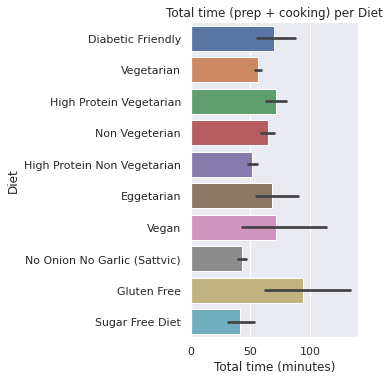

In [25]:
sns.set(rc={'figure.figsize':(100,10)})

sns.catplot(x='TotalTimeInMins',y='Diet',kind='bar',data=df)
plt.title('Total time (prep + cooking) per Diet')
plt.xlabel('Total time (minutes)')

Text(0.5, 8.95999999999998, 'Total time (minutes)')

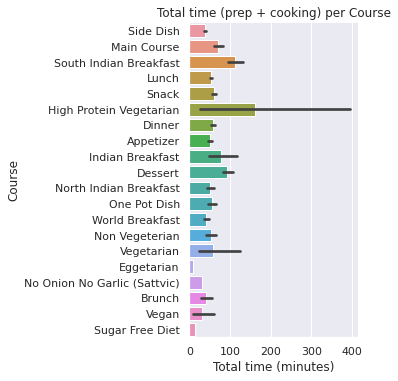

In [293]:
sns.catplot(x='TotalTimeInMins',y='Course',kind='bar',data=df)
plt.title('Total time (prep + cooking) per Course')
plt.xlabel('Total time (minutes)')

Text(0.5, 8.95999999999998, 'Total time (minutes)')

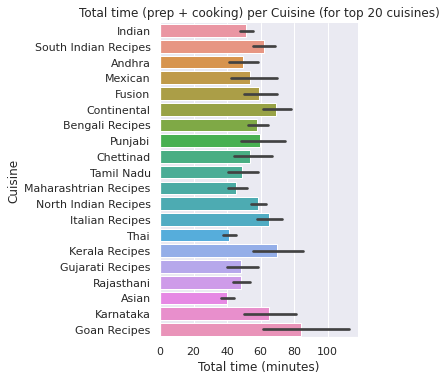

In [251]:
top20_cuisines = df[df.Cuisine.isin([cu[0] for cu in cuisines.most_common(20)])]
sns.catplot(x='TotalTimeInMins',y='Cuisine',kind='bar',data=top20_cuisines)
sns.set(rc={'figure.figsize':(3000,50)})
plt.title('Total time (prep + cooking) per Cuisine (for top 20 cuisines)')
plt.xlabel('Total time (minutes)')

## Filtering on ingredient and cooking time

In [26]:
df[( df['TranslatedRecipeName'].str.contains('onion') | df['IngredientCommaSep'].str.contains('shallot') ) & ( df['CookTimeInMins'] == 30 )]


,Srno,TranslatedRecipeName,TranslatedIngredients,PrepTimeInMins,CookTimeInMins,TotalTimeInMins,Cuisine,Course,Diet,TranslatedInstructions,IngredientCommaSep,IngredientList
171,184,Potato Vindaloo Recipe (Spicy Goan Potato Curry),12 Kashmiri dry red chillies - deseeded and so...,10,30,40,Goan Recipes,Lunch,Vegetarian,To begin making Potato Vindaloo Recipe first p...,"kashmiri dry red chilli,methi seed,garlic,shal...","[kashmiri dry red chilli, methi seed, garlic, ..."
217,233,Quinoa Vegetable Upma Recipe,"1 cup Quinoa,2 cups Water,2 tablespoons Extra ...",20,30,50,Fusion,Indian Breakfast,Diabetic Friendly,"To begin making Quinoa Vegetable Khichdi, firs...","quinoa,water,extra virgin olive oil,mustard se...","[quinoa, water, extra virgin olive oil, mustar..."
616,667,Kerala Style Fish Curry Recipe,1/2 kg Fish - (I have used sardine cleaned and...,10,30,40,Kerala Recipes,Lunch,High Protein Non Vegetarian,To begin making Kerala Style Fish Curry Recipe...,"kg fish,tamarind water,shallot,coconut oil,mus...","[kg fish, tamarind water, shallot, coconut oil..."
1505,1697,Sorakkai Puli Kuzhambu Recipe - Tangy Bottle G...,1 Bottle gourd (lauki) - peeled and diced into...,20,30,50,South Indian Recipes,Side Dish,Vegetarian,To begin making the Sorakkai Puli Kuzhambu Rec...,"bottle gourd,shallot,drumstick,tomato,garlic,g...","[bottle gourd, shallot, drumstick, tomato, gar..."
2378,2779,Sambal Telor with Nasi Uduk Recipe (Indonesian...,"4 Whole Eggs - boiled,4 Onion - thinly sliced,...",10,30,40,Asian,Dinner,Eggetarian,To begin making the Sambal Telor with Nasi Udu...,"whole egg,onion,to shallot,to garlic,byadagi d...","[whole egg, onion, to shallot, to garlic, byad..."
3192,3926,Pata Gobi Aur Kele Kofta Curry Recipe - No oni...,"1 Raw Banana - boiled and mashed,1 cup Cabbage...",10,30,40,North Indian Recipes,Lunch,No Onion No Garlic (Sattvic),To begin making the Pata Gobi Aur Kele Kofta C...,"raw banana,cabbage,gram flour,green chilli,cum...","[raw banana, cabbage, gram flour, green chilli..."
3504,4414,Vietnamese Lemongrass Shrimp Skewers Recipe,"500 grams Shrimps,1 Red Bell pepper (Capsicum)...",10,30,40,Vietnamese,Appetizer,Non Vegeterian,To begin making the Vietnamese Lemongrass Shri...,"shrimp,red bell pepper,shallot,garlic,fresh re...","[shrimp, red bell pepper, shallot, garlic, fre..."
3542,4474,Chettinad Eral Thokku Recipe - Prawn Masala,"400 grams Prawns - cleaned and deveined,1/2 cu...",10,30,40,Chettinad,Lunch,Non Vegeterian,To begin making the Chettinad Eral Thokku Reci...,"prawn,shallot,tomato,curry leaf,green chilli,g...","[prawn, shallot, tomato, curry leaf, green chi..."
4386,5881,One Pot Chicken Fried Rice Recipe,"1 cup Cooked rice,1 Fresh Red Chilli - finely ...",20,30,50,Indonesian,One Pot Dish,Non Vegeterian,To begin making the One Pot Chicken Nasi Goren...,"cooked rice,fresh red chilli,green chilli,garl...","[cooked rice, fresh red chilli, green chilli, ..."
4632,6310,Sweet Potato Tacos With Black Beans And Avocad...,"1 1/2 cup Sweet Potatoes - boiled,1/2 cup Cann...",20,30,50,Mexican,Dinner,Vegetarian,To begin with the Sweet Potato Tacos With Blac...,"sweet potato,canned black bean,paprika powder,...","[sweet potato, canned black bean, paprika powd..."


## Filtering on Gluten-Free and Sweet to recommend gluten-free sweet dishes

In [27]:
df[( df['Diet'] == 'Gluten Free' ) & ( df['Course'] == 'Dessert' )]

,Srno,TranslatedRecipeName,TranslatedIngredients,PrepTimeInMins,CookTimeInMins,TotalTimeInMins,Cuisine,Course,Diet,TranslatedInstructions,IngredientCommaSep,IngredientList
191,205,Malabar Kaai Curry Recipe With Nenthra Pazham,"2 Banana flower (Vazhaipoo) - ripe,1 cup Cocon...",60,30,90,Kerala Recipes,Dessert,Gluten Free,"To begin making the Malabar Kaai Curry, first ...","banana flower,coconut milk,coconut milk,rice,c...","[banana flower, coconut milk, coconut milk, ri..."
1493,1681,Gluten-Free Mango and Coconut Milk Ice-Cream R...,"500 grams Mango (Ripe),200 grams Condensed Mil...",20,30,50,Continental,Dessert,Gluten Free,To prepare the Mango and Coconut Milk Ice Crea...,"mango,condensed milk,ml coconut milk,mint leaf","[mango, condensed milk, ml coconut milk, mint ..."
1939,2228,Sholeh Zard Recipe - Persian Saffron Rice Pud...,"1 1/2 cup Basmati rice,8 cups Water,Salt - to ...",10,20,30,Middle Eastern,Dessert,Gluten Free,"To begin preparing the Sholeh Zard Recipe, was...","basmati rice,water,salt,icing sugar,ghee,saffr...","[basmati rice, water, salt, icing sugar, ghee,..."
4872,6786,Mochiko Dango Recipe - Sweet Japanese Dumplings,"1 cup Rice flour,3/4 cup Icing Sugar - powdere...",20,30,50,Japanese,Dessert,Gluten Free,To begin making Mochiko Dango recipe - Sweet J...,"rice flour,icing sugar,ghee,hot water","[rice flour, icing sugar, ghee, hot water]"
5974,9377,Sweet Potato Brownie Recipe,"2 Sweet Potatoes,1/3 cup Brown Sugar (Demerara...",25,40,65,Continental,Dessert,Gluten Free,"To begin with Sweet Potato Brownie Recipe, fir...","sweet potato,brown sugar,badam,rice flour,coco...","[sweet potato, brown sugar, badam, rice flour,..."
6609,11925,Thandai Mousse Recipe,"2 tablespoons Thandai Masala,2 teaspoon Agar a...",360,30,390,North Indian Recipes,Dessert,Gluten Free,"To prepare Thandai Mousse, cut china grass she...","thandai masala,agar agar,milk,sugar,heavy whip...","[thandai masala, agar agar, milk, sugar, heavy..."
